In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as cst

%matplotlib inline

# Rubidium
## Single photon transitions

In [50]:
def f_to_lam(f):
    return cst.c/f

In [51]:
# loading data from files
full_data_array = np.loadtxt("../Data/2016-01-29_776nm_8213A_g1.dat", skiprows=1)

time = full_data_array[:, 1]
t_delay = full_data_array[:,2]*1e-15
analog1 = full_data_array[:,3]
analog3 = full_data_array[:,4]
analog5 = full_data_array[:,5]
analog7 = full_data_array[:,6]

monochromator_frequency = cst.c /(774.45e-9)

In [52]:
full_signal = analog1 + 1j*analog3

#plt.plot(time, analog1)
#plt.plot(time,analog3)

5.00068173333e-14


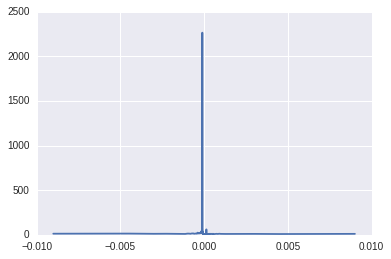

In [53]:
full_signal = analog1 + 1j*analog3

# to get the frequencies, we need to use fftfreq
delta_t = np.mean(np.diff(t_delay))
print(delta_t)
frequencies = np.fft.fftfreq(len(full_signal), delta_t)  #+ monochromator_frequency
frequencies = np.fft.fftshift(frequencies)

# fourier trafo and shifting data to correct sides
ft_full_signal = np.fft.fft(full_signal)
ft_full_signal = np.fft.fftshift(ft_full_signal)

wavelengths = f_to_lam(frequencies)
plt.plot(wavelengths, abs(ft_full_signal))

## Two photon transitions

5.00068173333e-14


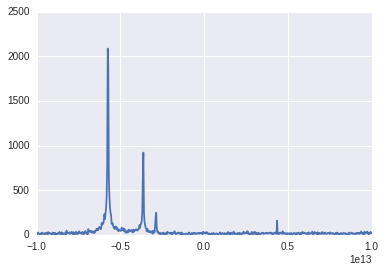

In [45]:
full_signal = analog5 + 1j*analog7

# to get the frequencies, we need to use fftfreq
delta_t = np.mean(np.diff(t_delay))
print(delta_t)
frequencies = np.fft.fftfreq(len(full_signal), delta_t)  #+ monochromator_frequency
frequencies = np.fft.fftshift(frequencies)

# fourier trafo and shifting data to correct sides
ft_full_signal = np.fft.fft(full_signal)
ft_full_signal = np.fft.fftshift(ft_full_signal)

plt.plot(frequencies, abs(ft_full_signal))
#plt.plot(analog5)
#plt.plot(analog7)